# Persian Spotify Analysis
Alright, listen up folks! We're about to dive into some serious data analysis and machine learning. We'll start with some EDA to get to know the data, and then we'll use machine learning to extract some juicy insights. So, let's not waste any time and get this journey started!

<div align="center">
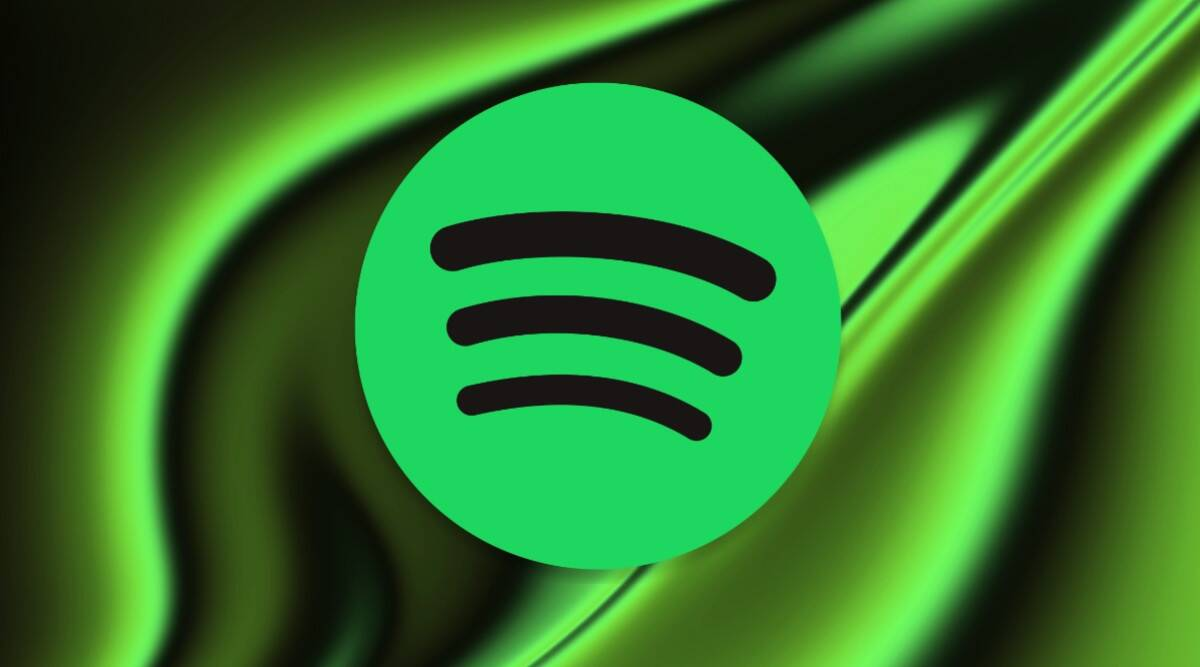
</div>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)
from pprint import pprint

In [2]:
%pwd

'/content'

# Load Spotify Dataset (CSV file)

In [3]:
!gdown 1VGjzOlOkg2jZi6azoM7lVz_py4xc41pU

Downloading...
From: https://drive.google.com/uc?id=1VGjzOlOkg2jZi6azoM7lVz_py4xc41pU
To: /content/Spotfiy_Persian_Artists.csv
100% 3.29M/3.29M [00:00<00:00, 88.2MB/s]


In [4]:
spotify_df = pd.read_csv('/content/Spotfiy_Persian_Artists.csv')
spotify_df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,931.000000,10632.000000,931.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,20.113856,5.576279,9.707841,1981.687453,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,10.415865,4.533367,6.744375,232.376793,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,13.000000,2.000000,5.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,20.000000,5.000000,10.000000,2010.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,28.000000,8.000000,12.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


# EDA

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It helps us to better understand the given data, so that we can make sense out of it. If EDA is not done properly, it can hamper the further steps in the machine learning model building process. On the other hand, if done well, it may improve the efficacy of everything we do next. In order to perform EDA, we need to follow a systematic approach that involves several techniques. The following are some of the key steps involved in EDA:

1. Data Sourcing: This is the very first step of EDA, where we access data and load it into our system.

2. Data Cleaning: Once we have the data, we need to clean it by removing any inconsistencies, missing values, or outliers.

3. Univariate Analysis: In this step, we analyze each variable in isolation to understand its distribution, central tendency, and spread.

4. Bivariate Analysis: Here, we analyze the relationship between two variables to understand how they are related to each other.

5. Multivariate Analysis: This step involves analyzing the relationship between multiple variables to understand how they are related to each other.

By conducting EDA, we can turn an almost unusable dataset into a completely usable one. EDA helps to clean up a dataset and gives us a better understanding of the variables and the relationships between them. It is a creative process that involves generating questions about the data, searching for answers by visualizing, transforming, and modeling the data, and using what we learn to refine our questions and/or generate new ones.


In this section, we want to explore a bit dataset characteristics. To do so, you will answer specified questions below.

In [5]:
spotify_df.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,NaN,Salar Aghili,سالار عقیلی,NaN,1,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,NaN,Salar Aghili,سالار عقیلی,NaN,2,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,NaN,Salar Aghili,سالار عقیلی,NaN,3,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,NaN,Salar Aghili,سالار عقیلی,NaN,4,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,NaN,Salar Aghili,سالار عقیلی,NaN,5,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


In [6]:
spotify_df.columns

Index(['track_id', 'disc_number', 'duration_ms', 'explicit', 'track_name',
       'track_name_farsi', 'artist_name', 'artist_name_farsi', 'popularity',
       'track_number', 'album_href', 'album_id', 'album_name',
       'album_release_date', 'album_total_tracks', 'album_release_year',
       'track_href', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_name', 'mode_name',
       'key_mode'],
      dtype='object')

## Q: Get number of songs by each of the artists in descending order

In [7]:
grouped_df = spotify_df.groupby('artist_name')

In [9]:
artist_song = {}
for artist, group in grouped_df:
  artist_song[artist] = len(group)

In [10]:
sorted_dict = dict(sorted(artist_song.items(), key=lambda x: x[1], reverse=True))

In [11]:
sorted_dict

{'Mohammadreza Shajarian': 554,
 'Hossein Alizadeh': 545,
 'Reza Sadeghi': 507,
 'Dariush': 465,
 'Alireza Eftekhari': 439,
 'Salar Aghili': 396,
 'Sattar': 361,
 'Moein': 334,
 'Parviz Meshkatian': 310,
 'Amir Tataloo': 293,
 'Shahram Nazeri': 285,
 'Farzad Farzin': 257,
 'Hamid Askari': 257,
 'Alireza Ghorbani': 255,
 'Homayoun Shajarian': 252,
 'Mohsen Yeganeh': 240,
 'Morteza Pashaei': 238,
 'Hassan Shamaizadeh': 227,
 'Mohsen Chavoshi': 226,
 'Ali Zand Vakili': 198,
 'Siavash Ghomayshi': 194,
 'Babak Jahanbakhsh': 169,
 'Mohammad Esfahani': 168,
 'Ali Lohrasbi': 163,
 'Peyman Yazdanian': 160,
 'Shahram Shabpareh': 158,
 'Benyamin Bahadori': 157,
 'Mazyar Fallahi': 157,
 'Mohammad Nouri': 147,
 'Mehdi Yarrahi': 132,
 'Mohsen Namjoo': 125,
 'Macan Band': 118,
 'Sirvan Khosravi': 110,
 'Xaniar Khosravi': 110,
 'Abdolhosein Mokhtabad': 106,
 'Majid Akhshabi': 106,
 'Abbas Ghaderi': 100,
 'Alireza Assar': 92,
 'Faramarz Aslani': 92,
 'Hesameddin Seraj': 90,
 'Iraj Bastami': 88,
 'Roozb

## Q: Get the average duration of songs by each of the artists in minutes

In [12]:
artist_duration = {}
for artist, group in grouped_df:
  artist_duration[artist] = (group['duration_ms'].mean()/ 60000)

In [13]:
artist_duration

{'Abbas Ghaderi': 5.074705,
 'Abdolhosein Mokhtabad': 6.228769496855346,
 'Afshin Moghaddam': 4.100779861111111,
 'Ali Lohrasbi': 3.6020791411042947,
 'Ali Zand Vakili': 4.854786195286196,
 'Alireza Assar': 4.700644927536231,
 'Alireza Eftekhari': 6.061560820045558,
 'Alireza Ghorbani': 5.620192483660131,
 'Amir Tataloo': 4.38559795221843,
 'Amirabbas Golab': 3.900943201754386,
 'Babak Jahanbakhsh': 3.610646351084813,
 'Benyamin Bahadori': 3.384453397027601,
 'Dang Show': 4.4095686868686865,
 'Dariush': 5.789160071684588,
 'Ebrahim Monsefi': 4.41295625,
 'Ehsan Khajeh Amiri': 3.8761480392156864,
 'Faramarz Aslani': 4.776182427536232,
 'Faramarz Assef': 5.494450684931507,
 'Farhad Mehrad': 4.077372666666666,
 'Farman Fathalian': 4.559305,
 'Farzad Farzin': 3.7276578469520105,
 'Hamed Homayoun': 3.260729513888889,
 'Hamid Askari': 3.5613196498054474,
 'Hamid Hami': 5.070125925925926,
 'Hassan Shamaizadeh': 4.908609765051395,
 'Hatam Asgari': 7.155097619047619,
 'Hesameddin Seraj': 6.7209

## Q: list of artist's unique names

In [14]:
artist_unique = spotify_df['artist_name'].unique()

In [15]:
artist_unique

array(['Salar Aghili', 'Mohsen Yeganeh', 'Mehdi Yarrahi',
       'Mohammadreza Shajarian', 'Morteza Pashaei', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Mohsen Chavoshi', 'Reza Sadeghi',
       'Abdolhosein Mokhtabad', 'Alireza Assar', 'Roozbeh Nematollahi',
       'Hossein Alizadeh', 'Peyman Yazdanian', 'Kayhan Kalhor',
       'Siavash Ghomayshi', 'Benyamin Bahadori', 'Alireza Eftekhari',
       'Majid Akhshabi', 'Faramarz Aslani', 'Iraj Bastami',
       'Ehsan Khajeh Amiri', 'Alireza Ghorbani', 'Parviz Meshkatian',
       'Mohammad Reza Lotfi', 'Dang Show', 'Nasser Abdollahi',
       'Soheil Nafissi', 'Farhad Mehrad', 'Afshin Moghaddam',
       'Koveyti Poor', 'Mohammad Golriz', 'Abbas Ghaderi',
       'Javad Yassari', 'Sattar', 'Mohsen Sharifian', 'Babak Jahanbakhsh',
       'Mazyar Fallahi', 'Mohammad Alizadeh', 'Farzad Farzin',
       'Ali Zand Vakili', 'Amirabbas Golab', 'Hamid Askari',
       'Mohsen Namjoo', 'Hamed Homayoun', 'Kaveh Deylami', 'Hatam Asgari',
       'Hamid

## Q: Plot average duration of tracks by year

In [26]:
# spotify_df.columns
spotify_df[['album_release_year','album_release_date']]

,album_release_year,album_release_date
0,2020,2020-02-03
1,2020,2020-02-03
2,2020,2020-02-03
3,2020,2020-02-03
4,2020,2020-02-03
...,...,...
10627,1985,1985-01-08
10628,2008,2008-10-07
10629,2008,2008-10-07
10630,2008,2008-10-07


In [45]:
def setup_year(x):
    if x['album_release_year'] == 0:
        x['album_release_year'] = x['album_release_date'].split('-')[0]
    return x

spotify_df = spotify_df.apply(setup_year, axis=1)
spotify_df['album_release_year'] = spotify_df['album_release_year'].astype(int)

In [46]:
type(spotify_df.iloc[-1]['album_release_year'])

numpy.int64

In [47]:
spotify_df[['album_release_year','album_release_date']]

,album_release_year,album_release_date
0,2020,2020-02-03
1,2020,2020-02-03
2,2020,2020-02-03
3,2020,2020-02-03
4,2020,2020-02-03
...,...,...
10627,1985,1985-01-08
10628,2008,2008-10-07
10629,2008,2008-10-07
10630,2008,2008-10-07


In [48]:
tracks_year = spotify_df.groupby('album_release_year')

In [49]:
avg_song_year = {}
for year, group in tracks_year:
  avg_song_year[year] = group['duration_ms'].mean() / 60000

In [50]:
avg_song_year

{1974: 9.25142,
 1975: 4.0320350000000005,
 1976: 4.655052564102564,
 1977: 7.502947619047619,
 1978: 7.170530555555556,
 1979: 11.387383333333334,
 1984: 6.768050793650794,
 1985: 5.80054031007752,
 1986: 4.444754945054945,
 1987: 4.050491304347826,
 1988: 5.344472549019607,
 1989: 5.968859803921569,
 1990: 5.001505871212122,
 1991: 6.099981344696969,
 1992: 5.262734972677595,
 1993: 4.616149294532628,
 1994: 4.1552243749999995,
 1995: 5.353670149253732,
 1996: 4.566880788804072,
 1997: 5.721133076923077,
 1998: 5.198824074074074,
 1999: 4.617645726495726,
 2000: 4.140319565217392,
 2001: 4.977461538461538,
 2002: 4.830721264367816,
 2003: 5.358399431818182,
 2004: 4.839378108465609,
 2005: 5.015987340301975,
 2006: 5.289666367265468,
 2007: 5.171455829015544,
 2008: 5.429058227176221,
 2009: 5.2164095008051525,
 2010: 5.909927296401515,
 2011: 4.495925138632162,
 2012: 4.7147151626016255,
 2013: 4.400182575757576,
 2014: 4.535827378358751,
 2015: 4.297092660550459,
 2016: 4.961221093

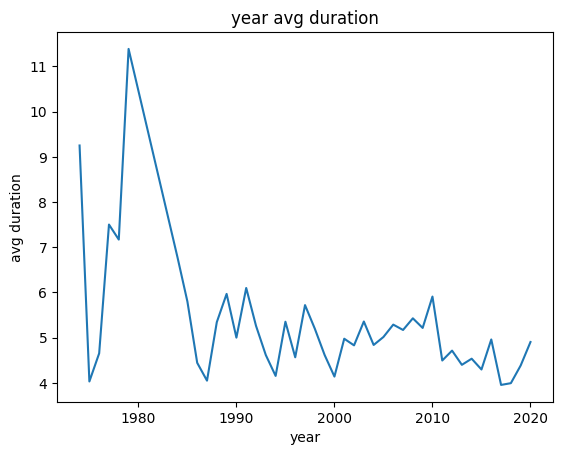

In [53]:
x = list(avg_song_year.keys())
y = list(avg_song_year.values())
plt.plot(x, y)  # Replace y with your actual data
plt.xlabel('year')
plt.ylabel('avg duration')
plt.title('year avg duration')
plt.show()

## Q: Plot average loudness of tracks by year

In [61]:
spotify_df['loudness']

0        -7.170
1       -10.008
2        -5.392
3       -12.287
4        -5.702
          ...  
10627   -10.805
10628   -17.538
10629   -15.865
10630   -13.286
10631   -11.577
Name: loudness, Length: 10632, dtype: float64

In [62]:
loudness_year = {}
for year, group in tracks_year:
  loudness_year[year] = group['loudness'].mean()

In [63]:
loudness_year

{1974: -16.3958,
 1975: -15.7959,
 1976: -11.95346153846154,
 1977: -12.937380952380952,
 1978: -12.2085,
 1979: -17.5662,
 1984: -14.21947619047619,
 1985: -12.783,
 1986: -11.97424175824176,
 1987: -11.503130434782609,
 1988: -13.26237647058824,
 1989: -13.770823529411764,
 1990: -14.39243181818182,
 1991: -12.017636363636365,
 1992: -15.449926229508197,
 1993: -14.689402116402114,
 1994: -13.831850000000003,
 1995: -12.533597014925373,
 1996: -15.789564885496183,
 1997: -12.908246153846155,
 1998: -12.27149074074074,
 1999: -12.595837606837607,
 2000: -11.38518115942029,
 2001: -12.238331360946747,
 2002: -10.795369458128079,
 2003: -11.483482954545453,
 2004: -11.379952380952382,
 2005: -12.331216027874564,
 2006: -9.851458083832334,
 2007: -11.034256476683938,
 2008: -10.685656050955414,
 2009: -10.069599033816425,
 2010: -11.057450284090908,
 2011: -9.600813308687615,
 2012: -9.295678048780488,
 2013: -8.317973684210525,
 2014: -8.32088888888889,
 2015: -8.373654434250764,
 2016:

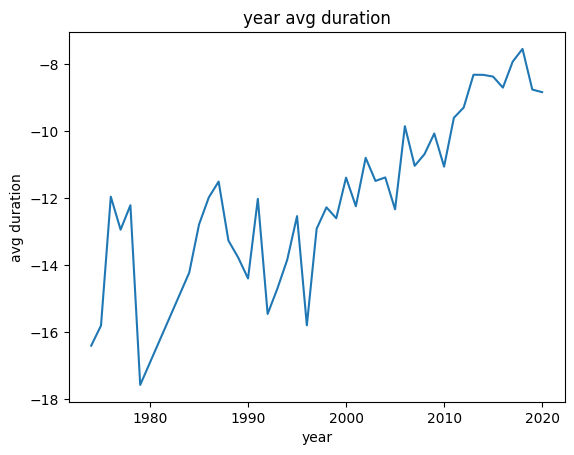

In [64]:
x = list(loudness_year.keys())
y = list(loudness_year.values())
plt.plot(x, y)  # Replace y with your actual data
plt.xlabel('year')
plt.ylabel('avg duration')
plt.title('year avg duration')
plt.show()

## Q: Music attributes of songs over the years


In [65]:
# the columns that we are interseted in
target_cols = ["acousticness","danceability","energy","speechiness","liveness","valence"]

In [67]:
spotify_df[target_cols]

,acousticness,danceability,energy,speechiness,liveness,valence
0,0.839,0.437,0.390,0.0299,0.1360,0.3300
1,0.970,0.379,0.146,0.0414,0.0812,0.3460
2,0.664,0.437,0.453,0.0349,0.1100,0.5010
3,0.915,0.488,0.138,0.0451,0.2120,0.4450
4,0.657,0.301,0.443,0.0334,0.1200,0.4100
...,...,...,...,...,...,...
10627,0.946,0.356,0.499,0.0452,0.3530,0.3960
10628,0.982,0.318,0.163,0.0690,0.6670,0.1610
10629,0.883,0.213,0.218,0.0350,0.2630,0.1390
10630,0.842,0.242,0.304,0.0369,0.7980,0.2100


In [69]:
grouped = spotify_df.groupby('album_release_year')[target_cols]

In [73]:
for year,content in grouped:
    print(f'year: {year}')
    print(content)
    break

year: 1974
     acousticness  danceability  energy  speechiness  liveness  valence
871         0.962         0.384  0.0836       0.0730     0.353    0.259
872         0.985         0.332  0.1110       0.0544     0.295    0.189
873         0.978         0.369  0.0912       0.0484     0.115    0.398
874         0.995         0.298  0.1680       0.0391     0.094    0.413
875         0.994         0.302  0.0669       0.0772     0.111    0.148


## Q: Plot top 10 popular tracks (Bar Chart)

In [81]:
spotify_df.columns

Index(['track_id', 'disc_number', 'duration_ms', 'explicit', 'track_name',
       'track_name_farsi', 'artist_name', 'artist_name_farsi', 'popularity',
       'track_number', 'album_href', 'album_id', 'album_name',
       'album_release_date', 'album_total_tracks', 'album_release_year',
       'track_href', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_name', 'mode_name',
       'key_mode'],
      dtype='object')

In [75]:
pop_tracks = spotify_df[['track_name','popularity']].dropna(subset='popularity').sort_values('popularity', ascending=False).drop_duplicates(subset='track_name')[:10]

In [77]:
spotify_df['popularity'].sort_values(ascending=False)

9173     48.0
9172     46.0
6578     43.0
7250     42.0
4050     42.0
         ... 
10626     NaN
10627     NaN
10628     NaN
10629     NaN
10630     NaN
Name: popularity, Length: 10632, dtype: float64

In [78]:
pop_tracks

,track_name,popularity
9173,Gentleman,48.0
9172,Doctor,46.0
6578,Asheghaneh,43.0
7250,Zolf,42.0
4050,Age Ye Rooz,42.0
395,Behet Ghol Midam,42.0
8834,Navazesh,41.0
9545,Gole Yakh,41.0
444,Dooset Daram,40.0
9184,Saaghiya,40.0


<Figure size 1000x600 with 0 Axes>

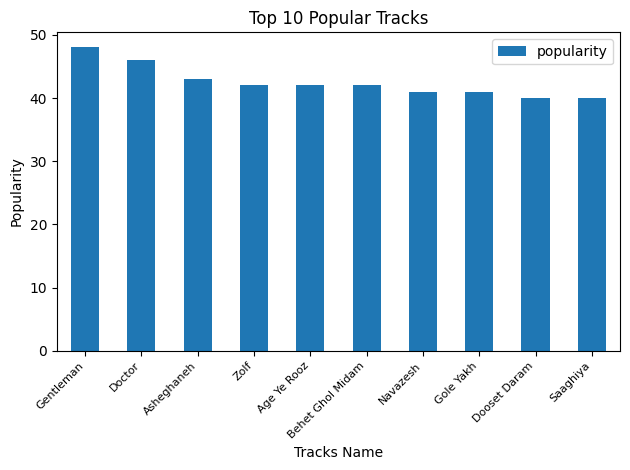

In [79]:
plt.figure(figsize=(10, 6))
ax = pop_tracks.plot.bar(x='track_name', y='popularity')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.xlabel('Tracks Name')
plt.ylabel('Popularity')
plt.title('Top 10 Popular Tracks')
plt.tight_layout()
plt.show()

## Q: Plot top 10 popular artist (Bar Chart)

In [25]:
pop_artists = spotify_df[['artist_name','popularity']].dropna(subset='popularity').sort_values('popularity', ascending=False).drop_duplicates(subset='artist_name')[:10]

<Figure size 1000x600 with 0 Axes>

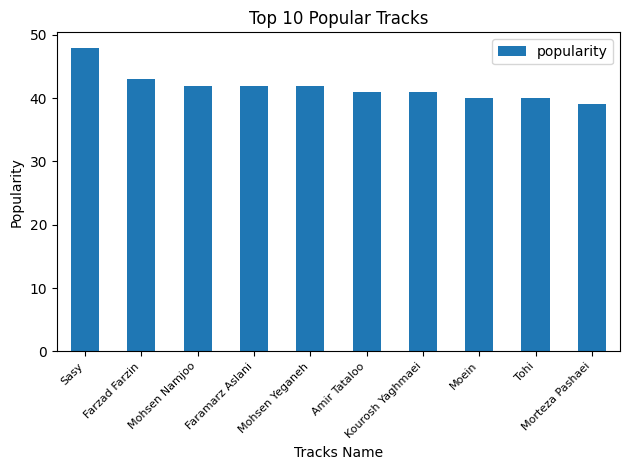

In [26]:
plt.figure(figsize=(10, 6))
ax = pop_artists.plot.bar(x='artist_name', y='popularity')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.xlabel('Tracks Name')
plt.ylabel('Popularity')
plt.title('Top 10 Popular Tracks')
plt.tight_layout()
plt.show()

## Q: Plot correlation matrix's heatmap
What are the most correlated features with `duration_ms` and `popularity`?

for duration_ms after itself, acousticness          0.170713

for popularity after itself,
loudness              0.345591


In [82]:
numeric_columns = spotify_df.select_dtypes(include='number')
print(numeric_columns.columns)

Index(['disc_number', 'duration_ms', 'popularity', 'track_number',
       'album_total_tracks', 'album_release_year', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')


In [83]:
correlation_matrix = spotify_df[numeric_columns.columns].corr()

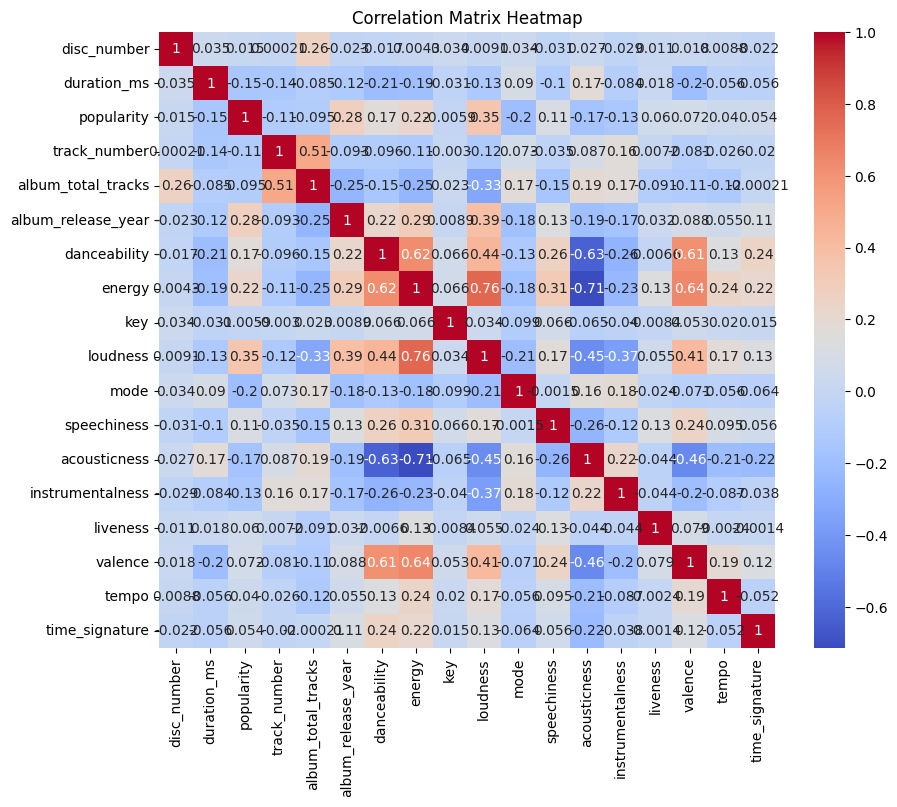

In [84]:
# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [85]:
# Calculating the correlation matrix
correlation_duration = correlation_matrix['duration_ms'].sort_values(ascending=False)
correlation_popularity = correlation_matrix['popularity'].sort_values(ascending=False)

In [86]:
print("Correlation with 'duration_ms':")
print(correlation_duration)
print('---------------------------------------------')
print("Correlation with 'popularity':")
print(correlation_popularity)

Correlation with 'duration_ms':
duration_ms           1.000000
acousticness          0.170713
mode                  0.089504
disc_number           0.035092
liveness              0.018118
key                  -0.031191
time_signature       -0.055702
tempo                -0.055874
instrumentalness     -0.084382
album_total_tracks   -0.084771
speechiness          -0.102299
album_release_year   -0.117552
loudness             -0.129694
track_number         -0.136570
popularity           -0.150982
energy               -0.193684
valence              -0.200632
danceability         -0.210401
Name: duration_ms, dtype: float64
---------------------------------------------
Correlation with 'popularity':
popularity            1.000000
loudness              0.345591
album_release_year    0.278081
energy                0.223515
danceability          0.166421
speechiness           0.114274
valence               0.072353
liveness              0.060086
time_signature        0.054152
tempo               

## Q: Plot box-plot for each feature
Compare box-plot values of `energy` and `liveness`

In [87]:
numeric_columns = spotify_df.select_dtypes(include='number')

In [88]:
print(numeric_columns.columns)

Index(['disc_number', 'duration_ms', 'popularity', 'track_number',
       'album_total_tracks', 'album_release_year', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')


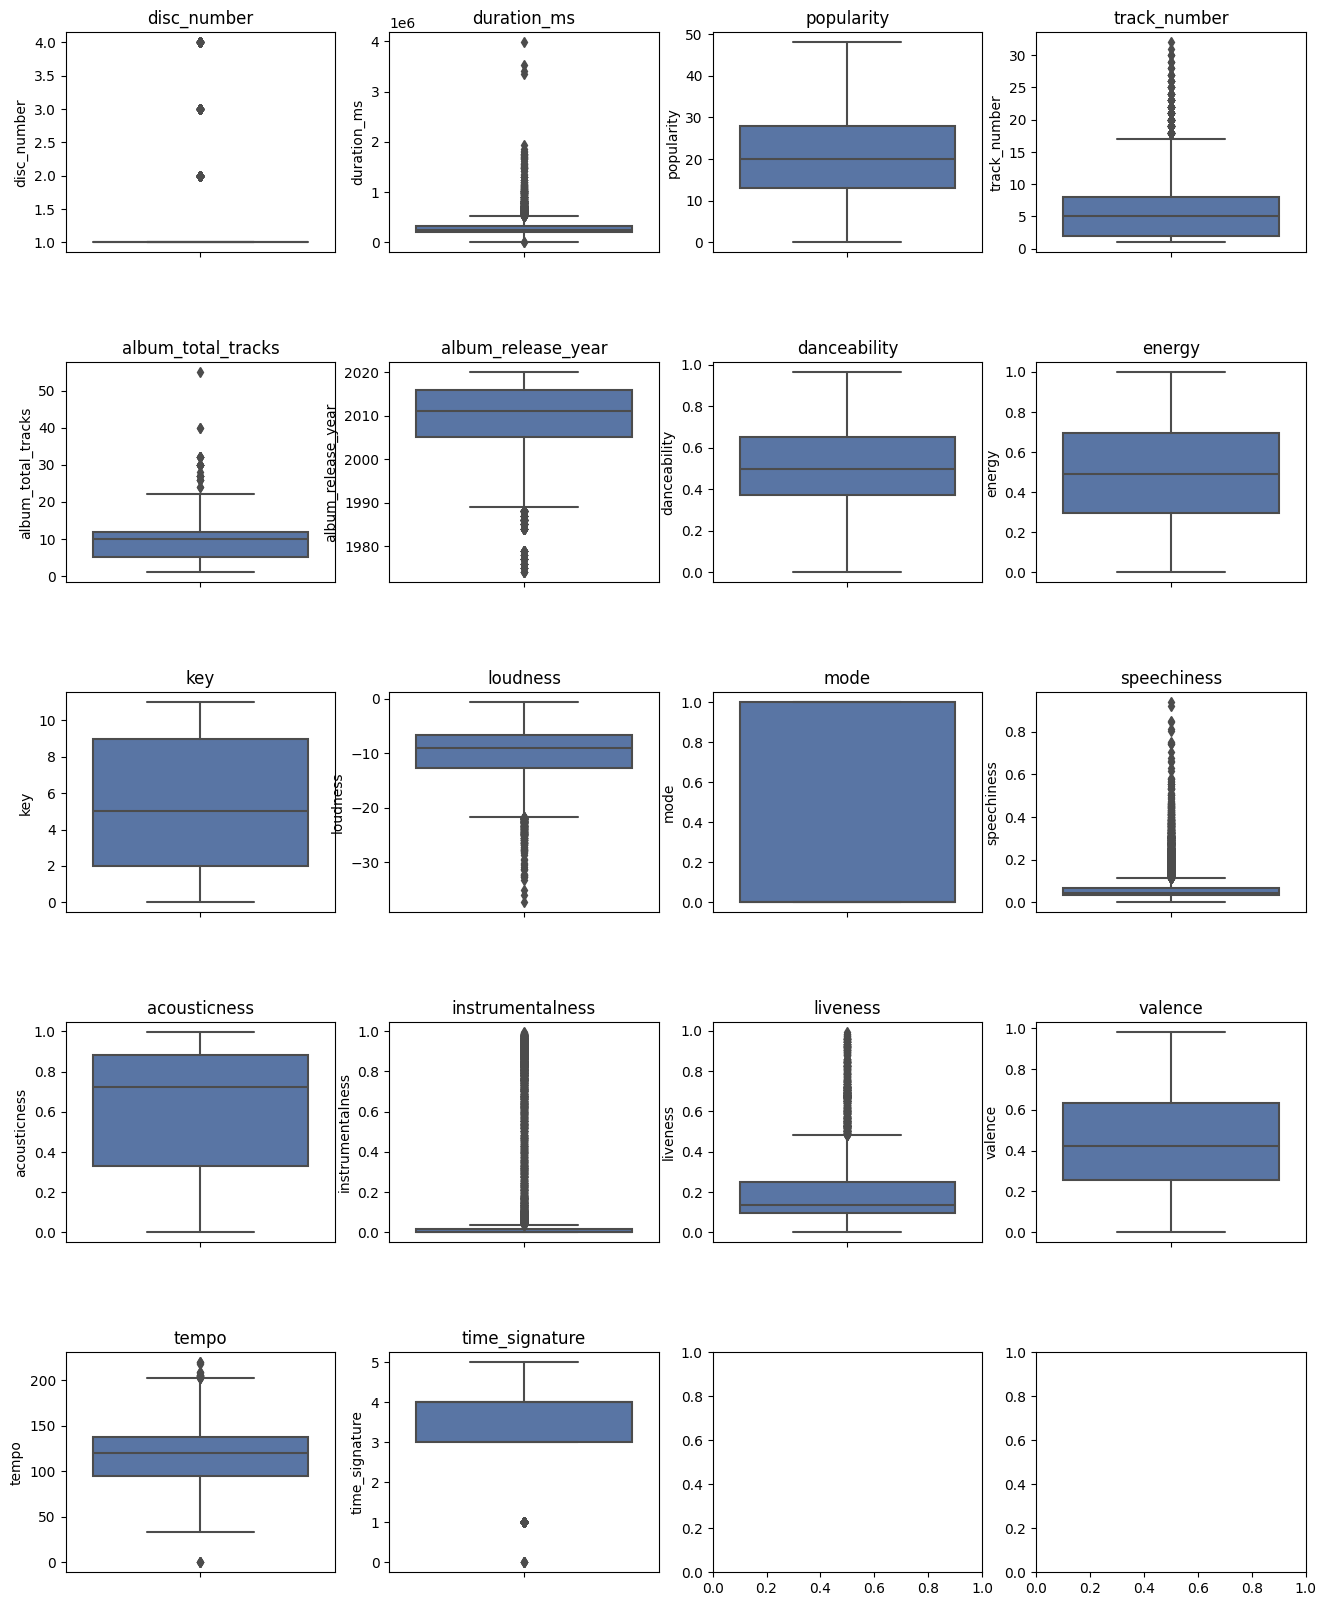

In [89]:
numeric_columns = spotify_df.select_dtypes(include='number')

# Calculate the number of rows and columns for the subplots grid
num_cols = len(numeric_columns.columns)
num_rows = (num_cols - 1) // 4 + 1  # Adjust the number of columns per row as desired

fig, axes = plt.subplots(num_rows, 4, figsize=(16, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots

sns.set(style="ticks")
for i, column in enumerate(numeric_columns.columns):
    ax = axes[i // 4, i % 4] if num_rows > 1 else axes[i % 4]
    sns.boxplot(data=spotify_df, y=column, ax=ax)
    ax.set_title(column)

plt.show()


## Q: Missing values
How many `nan` values are there in each column?

In [90]:
# Count the number of NaN values in each column
nan_counts = spotify_df.isna().sum()
print(nan_counts)

track_id                  0
disc_number               0
duration_ms               0
explicit                  0
track_name                0
track_name_farsi      10020
artist_name               0
artist_name_farsi         0
popularity             9701
track_number              0
album_href             9701
album_id                  0
album_name                0
album_release_date        0
album_total_tracks     9701
album_release_year        0
track_href                0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
key_name                144
mode_name               144
key_mode                144
dtype: int64


# Handling nan values of dataframe
- Fill categorical features with "None"
- Fill numerical features with appropriate approach(mean, median or any imputation). Explain your choice.

In [91]:
categorical_columns = spotify_df.select_dtypes(include='object').columns
spotify_df[categorical_columns] = spotify_df[categorical_columns].fillna('None')

Mean: Filling NaN values with the mean is appropriate when the data is normally distributed and there are no extreme outliers. The mean is sensitive to extreme values, so if your data has outliers, using the mean may introduce bias.

Median: Filling NaN values with the median is suitable when the data contains outliers or is not normally distributed. The median is robust to outliers and provides a more representative central value in such cases.

Other imputation methods: There are various other imputation techniques available, such as using the mode for categorical data, using regression models to predict missing values based on other features, or using more advanced imputation methods like K-nearest neighbors (KNN) or matrix completion techniques. These methods can be useful when the missing values have complex patterns or when there are relationships among the features that can be leveraged for imputation.

In [92]:
df = spotify_df

In [93]:
numerical_columns = df.select_dtypes(include=np.number)

# Fill NaN values in numerical columns
for column in numerical_columns.columns:
    if df[column].isna().sum() > 0:
        # Check if the column has NaN values
        if df[column].dtype == np.float64 or df[column].dtype == np.int64:
            # For numeric columns, choose appropriate imputation approach
            if df[column].dtype == np.float64:
                # If data has outliers or not normally distributed, fill with median
                if df[column].skew() > 1 or df[column].kurt() > 3:
                    df[column].fillna(df[column].median(), inplace=True)
                # Otherwise, fill with mean
                else:
                    df[column].fillna(df[column].mean(), inplace=True)
            else:
                # For integer columns, fill with mean
                df[column].fillna(df[column].mean(), inplace=True)
        else:
            # For other numerical types (e.g., datetime), fill with appropriate value
            df[column].fillna('None', inplace=True)

# Determine your desired features here

In [94]:
music_feature_cols = [
    'duration_ms','danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo']

In [95]:
tracks_feature_df = spotify_df[music_feature_cols + ['artist_name']].dropna()

In [97]:
tracks_feature_df.describe()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1.063200e+04,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,2.888011e+05,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223
std,1.695220e+05,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699
min,3.996000e+03,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000
25%,2.035690e+05,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750
50%,2.536180e+05,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000
75%,3.337745e+05,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000
max,3.978450e+06,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000


In [96]:
tracks_feature_df.iloc[0]

duration_ms               446880
danceability               0.437
energy                      0.39
key                            0
loudness                   -7.17
mode                           0
speechiness               0.0299
acousticness               0.839
instrumentalness        0.000035
liveness                   0.136
valence                     0.33
tempo                    131.913
artist_name         Salar Aghili
Name: 0, dtype: object

## Feature Preprocessing
In this section, you should preprocess desired features to get suitable for using in machine learning models.

In [98]:
numeric_cols = [col for col in music_feature_cols if col not in ['artist_name']]
scaler = StandardScaler()
tracks_feature_df[numeric_cols] = scaler.fit_transform(tracks_feature_df[numeric_cols])

In [99]:
tracks_feature_df

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name
0,0.932542,-0.428643,-0.440144,-1.432162,0.629863,-0.772888,-0.561985,0.721928,-0.448047,-0.369816,-0.504217,0.420102,Salar Aghili
1,3.321961,-0.765201,-1.449424,-0.056665,0.013646,1.293849,-0.400182,1.134163,-0.446904,-0.723920,-0.437288,-0.460848,Salar Aghili
2,0.025714,-0.428643,-0.179551,-0.056665,1.015921,-0.772888,-0.491636,0.171232,-0.440888,-0.537822,0.211093,-0.829030,Salar Aghili
3,2.123240,-0.132704,-1.482515,-0.881964,-0.481195,-0.772888,-0.348124,0.961087,-0.425022,0.121278,-0.023160,-0.282070,Salar Aghili
4,-0.090383,-1.217813,-0.220915,-1.432162,0.948610,-0.772888,-0.512741,0.149205,-0.448140,-0.473204,-0.169569,0.961163,Salar Aghili
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,0.641268,-0.898663,0.010723,-0.331765,-0.159407,-0.772888,-0.346717,1.058639,-0.428962,1.032386,-0.228132,0.912152,Shahram Nazeri
10628,19.074364,-1.119167,-1.379105,-0.056665,-1.621347,-0.772888,-0.011856,1.171925,-0.232174,3.061378,-1.211161,-1.575654,Shahram Nazeri
10629,18.369602,-1.728453,-1.151603,0.768633,-1.258088,1.293849,-0.490229,0.860389,-0.379924,0.450827,-1.303190,-1.097415,Shahram Nazeri
10630,18.015808,-1.560174,-0.795874,0.768633,-0.698108,1.293849,-0.463496,0.731369,0.336312,3.907869,-1.006189,-1.393289,Shahram Nazeri


## Visualize Dataset Features using Dimension Reduction models (e.g. PCA)

(10632, 2)


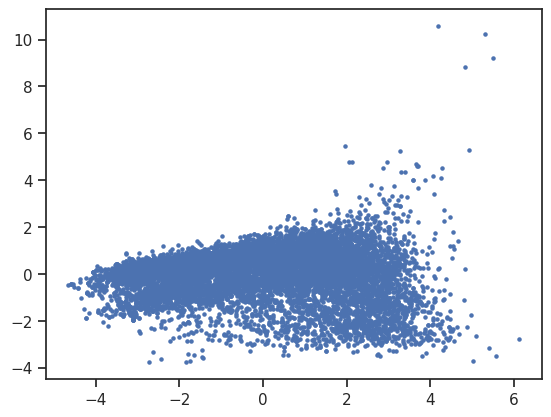

In [101]:
pca = PCA(n_components=2)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)

(10632, 3)


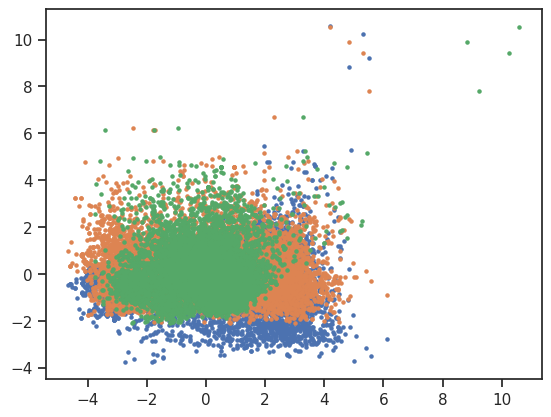

In [102]:
pca = PCA(n_components=3)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 2], s=5)
plt.scatter(tracks_feature_visual[:, 1], tracks_feature_visual[:, 2], s=5)

## Regression

In [103]:
# Set random seed to make results reproducible
RANDOM_SEED = 42

In [104]:
df = spotify_df
regression_features = ['duration_ms','danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo'
]
x=df.loc[:, regression_features].values
y=df.loc[:,'popularity'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=RANDOM_SEED)

In this section, you should use `LinearRegression` class in scikit-learn library to implement regression algorithm. note that you should pass suitable parameters to get better results.

In [105]:
regressor = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

21.701693335364737
[-4.17558531e-07  5.30106141e-01 -9.07195818e-01 -1.17064402e-02
  8.63809952e-02 -2.89608651e-01  1.42969976e+00 -3.05571011e-01
  1.47239884e-01  1.24289311e-01 -4.98493534e-01  1.11508053e-04]


## Evaluate Regression Algorithm

In [106]:
y_pred = regressor.predict(x_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_output

,Actual,Predicted
0,13.000000,20.183374
1,20.113856,20.454653
2,20.113856,20.595471
3,20.113856,19.981691
4,20.113856,19.780313
...,...,...
3185,20.113856,20.461177
3186,12.000000,20.017152
3187,20.113856,19.530298
3188,20.113856,20.287280


In [107]:
#autograde
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9979626974417956
Mean Squared Error: 8.851828455804414
Root Mean Squared Error: 2.97520225460462


# Classification

## Prepare Labels

In [108]:
sonnati_artists = ['Salar Aghili', 'Mohammadreza Shajarian', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Abdolhosein Mokhtabad', 'Hossein Alizadeh',
       'Kayhan Kalhor', 'Alireza Eftekhari', 'Iraj Bastami', 'Alireza Ghorbani',
       'Parviz Meshkatian', 'Mohammad Reza Lotfi', 'Ali Zand Vakili', 'Kaveh Deylami',
       'Hatam Asgari', 'Homayoun Shajarian', 'Shahram Nazeri']

## Add `is_sonnati` feature column
Using `sonnati_artist` list, add new feature column `is_sonnati` that determines a song whether a song is sonnati

In [109]:
tracks_feature_df['is_sonnati'] = False
# Set the value to True for songs by sonnati artists
tracks_feature_df.loc[df['artist_name'].isin(sonnati_artists), 'is_sonnati'] = True
tracks_feature_df.drop('artist_name', axis=1, inplace=True)

In [110]:
tracks_feature_df.iloc[0]

duration_ms         0.932542
danceability       -0.428643
energy             -0.440144
key                -1.432162
loudness            0.629863
mode               -0.772888
speechiness        -0.561985
acousticness        0.721928
instrumentalness   -0.448047
liveness           -0.369816
valence            -0.504217
tempo               0.420102
is_sonnati              True
Name: 0, dtype: object

## Create Classification Dataset

In [111]:
x = tracks_feature_df.reset_index().drop(columns=['is_sonnati']).values
y = tracks_feature_df['is_sonnati'].values

In [112]:
print(f'{x.shape=}')
print(f'{y.shape=}')

x.shape=(10632, 13)
y.shape=(10632,)


In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True)

## Choose a Model and Report the Evaluation Metrics

`fit_and_eval` function takes two parameters:
- scikit-learn classification model
- dataset object (that is a tuple of `x` and `y`)


you should just instantiate your model and pass your desired parameters and then get the result of testing over test part of dataset.

In [114]:
#autograde
def fit_and_eval(model, dataset):
    """
    Train scikit-learn model on given dataset

    model: scikit-learn model
    dataset: tuple of x's and y's (whole data without any split)

    return:
        dict: evaluation metrics report
    """
    eval_metrics = {}
    x, y = dataset
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True
    )
    # train model
    classifier = make_pipeline(StandardScaler(), model)

    # ignore index column for training and inferencing
    classifier.fit(x_train[:, 1:], y_train)
    y_pred = classifier.predict(x_test[:, 1:])

    # export predictions to submit to kaggle
    pd.DataFrame({'id': x_test[:, 0].astype(int), 'predicted': y_pred}, dtype=str).to_csv('spotify_pred.csv', index=False)

    # evaluate model
    eval_metrics['acc'] = accuracy_score(y_test, y_pred)
    eval_metrics['precision'] = precision_score(y_test, y_pred)
    eval_metrics['recall'] = recall_score(y_test, y_pred)
    eval_metrics['f1'] = f1_score(y_test, y_pred)
    eval_metrics['confusion'] = confusion_matrix(y_test, y_pred)
    return eval_metrics

In [115]:
# here is an example
dataset = (x, y)
pprint(fit_and_eval(KNeighborsClassifier(n_neighbors=1), dataset))

{'acc': 0.831974921630094,
 'confusion': array([[1820,  275],
       [ 261,  834]]),
 'f1': 0.7568058076225045,
 'precision': 0.7520288548241659,
 'recall': 0.7616438356164383}


In [117]:
pprint(fit_and_eval(RandomForestClassifier(), dataset))

{'acc': 0.8739811912225706,
 'confusion': array([[1890,  205],
       [ 197,  898]]),
 'f1': 0.8171064604185624,
 'precision': 0.814143245693563,
 'recall': 0.8200913242009132}


We can see the F1 score is 81% using Random Forest classifier.